In [75]:
# This code is based on the sample code given in Thomas Miller's book 'Marketing Data Science', Chapter 2

#import packages:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

#read data form csv file:
syd_data= pd.read_csv("D:\CaviConsulting\MarketResearch\Market Data science\chapter2\MDS_Chapter_2\MDS_Chapter_2\sydney.csv")
print(syd_data)

     cartime  carcost  traintime  traincost choice
0         70       50         64         39  TRAIN
1         50      230         60         32  TRAIN
2         50       70         58         40    CAR
3         60      108         93         62    CAR
4         70       60         68         26  TRAIN
5         20       32         72         65    CAR
6         40       30         60         37  TRAIN
7         15        8         22         20    CAR
8         60       60         83         31  TRAIN
9         29       20         40         17    CAR
10        36       30         65         70    CAR
11        50       30        125         60    CAR
12        63       35        145         60    CAR
13        20       30         48         25    CAR
14        60       40         85         45    CAR
15        30       20         60         35  TRAIN
16        47       60         79         26  TRAIN
17        60       72         50         26  TRAIN
18        55       40         4

In [76]:
resp_binary= {'TRAIN':1,'CAR':0}
y = syd_data['choice'].map(resp_binary)
cartime = syd_data['cartime']
carcost = syd_data['carcost']
traintime = syd_data['traintime']
traincost = syd_data['traincost']
intercept= np.array([1]*len(y))
#Leaving teh first column as 1s for B0
x=np.array([intercept,cartime,carcost,traintime,traincost]).T
                     

In [81]:
sns.boxplot(x=syd_data['choice'],y=cartime);
sns.boxplot(x=syd_data['choice'],y=carcost);
sns.boxplot(x=syd_data['choice'],y=traintime);
sns.boxplot(x=syd_data['choice'],y=traincost);


In [83]:
fig, axs = plt.subplots(2,2)
#axs[0,0].scatter(cartime,carcost)
axs[0,0].boxplot(syd_data['choice'],cartime)
axs[0,1].boxplot(syd_data['choice'],carcost)
axs[1,0].boxplot(syd_data['choice'],traintime)
axs[1,1].boxplot(syd_data['choice'],traincost)
plt.show()

TypeError: cannot perform reduce with flexible type

In [45]:
#logistic regression:
logreg=sm.GLM(y,x,family=sm.families.Binomial())
syd_fit=logreg.fit()
print(syd_fit.summary())
syd_data['train_prob']= syd_fit.predict(linear=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 choice   No. Observations:                  333
Model:                            GLM   Df Residuals:                      328
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -136.32
Date:                Thu, 01 Mar 2018   Deviance:                       272.63
Time:                        17:26:02   Pearson chi2:                     326.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4440      0.585     -2.468      0.014      -2.591      -0.297
x1             0.0565      0.011      5.179      0.0

In [46]:
#function to convert probability to choice prediction because we coded it as 1 and 0 :
def prob2resp(response_prob,cutoff):
    if(response_prob>cutoff):
        return('TRAIN')
    else:
        return('CAR')
    

In [47]:
syd_data['choice_pred']= syd_data['train_prob'].apply(lambda d: prob2resp(d,cutoff=0.5))
conmat=pd.crosstab(syd_data['choice_pred'],syd_data['choice'])
print(conmat)

choice       CAR  TRAIN
choice_pred            
CAR          155     30
TRAIN         28    120


In [48]:
a=float(conmat.iloc[0,0])
b=float(conmat.iloc[0,1])
c=float(conmat.iloc[1,0])
d=float(conmat.iloc[1,1])
n=a+b+c+d
predictive_accuracy=(a+d)/n
print('\n Percentage correctly predicted:',round(predictive_accuracy,3),"\n")


 Percentage correctly predicted: 0.826 



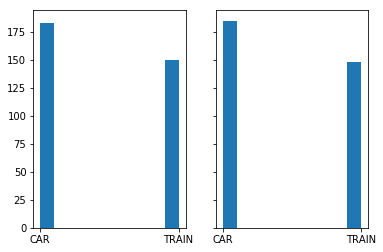

In [50]:

fix, axs = plt.subplots(1,2,sharey=True)
axs[0].hist(syd_data['choice'])
axs[1].hist(syd_data['choice_pred'])
plt.show()

In [51]:
print(syd_data)

     cartime  carcost  traintime  traincost choice  train_prob choice_pred
0         70       50         64         39  TRAIN    0.649733       TRAIN
1         50      230         60         32  TRAIN    0.996237       TRAIN
2         50       70         58         40    CAR    0.470977         CAR
3         60      108         93         62    CAR    0.414966         CAR
4         70       60         68         26  TRAIN    0.918547       TRAIN
5         20       32         72         65    CAR    0.003994         CAR
6         40       30         60         37  TRAIN    0.180750         CAR
7         15        8         22         20    CAR    0.094888         CAR
8         60       60         83         31  TRAIN    0.821274       TRAIN
9         29       20         40         17    CAR    0.376657         CAR
10        36       30         65         70    CAR    0.004795         CAR
11        50       30        125         60    CAR    0.073352         CAR
12        63       35    